<a href="https://colab.research.google.com/github/catastropiyush/coursework-notebooks/blob/main/Rutherford_Scattering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

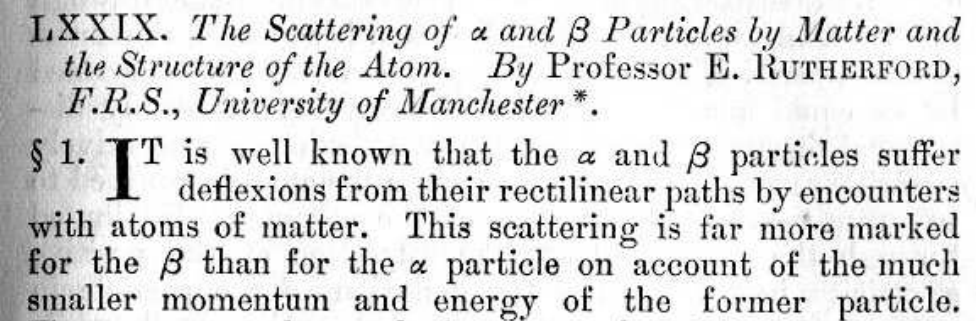

https://personal.math.ubc.ca/~cass/rutherford/r.pdf

https://pyproblems.github.io/book/nuc1.html

In [1]:
!sudo apt-get install texlive-latex-extra texlive-fonts-recommended dvipng cm-super

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  cm-super-minimal dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern
  fonts-noto-mono fonts-texgyre fonts-urw-base35 ghostscript
  libapache-pom-java libcommons-logging-java libcommons-parent-java
  libfontbox-java libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35
  libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0 libsynctex2
  libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern
  pfb2t1c2pfb poppler-data preview-latex-style rake ruby ruby-net-telnet
  ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration t1utils
  tex-common tex-gyre texlive-base texlive-binaries texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa
  xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf ghostscript-x
  libavalon-fram

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [3]:
rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

In [4]:
%matplotlib inline
from scipy import constants
import numpy as np
import matplotlib.pyplot as plt

q1 = constants.e * 79  # Large nucleus charge
q2 = constants.e * 2   # Small nuclear charge
m = 6.64424e-27       # Small nucleus mass
v0 = 1e7              # Initial velocity

# Define a Coulomb potential
def Coulomb(r,Q,q):
    return Q*q/(4*np.pi*constants.epsilon_0*np.linalg.norm(r)**3) * r

In [5]:
r_int = q1*q2/(2*np.pi*constants.epsilon_0*m*v0**2)
print(r_int)

1.0972458950007652e-13


In [6]:
sd = 1e-12            # Size of simulation domain (in z axis)
dt = 1e-22            # Simulation time step

# Define a function to simulate ion trajectory
def collide(b):
    rvals = []  # A list to record the trajectory of the particle for plotting
    r = np.array([b,0.0,-sd])   # Initial particle position
    v = np.array([0.0,0.0,v0])  # Initial particle velocity

    exited = False
    while not exited:
        rvals.append(r.copy())  # Record current position

        # Evaluate Coulomb force and take an Euler step
        v += dt * Coulomb(r,q1,q2) / m
        r += dt * v

        # If the particle z-position is outside of the simulation domain, terminate
        if np.abs(r[2]) > sd:
            exited = True

    # return the particle trajectory
    return rvals

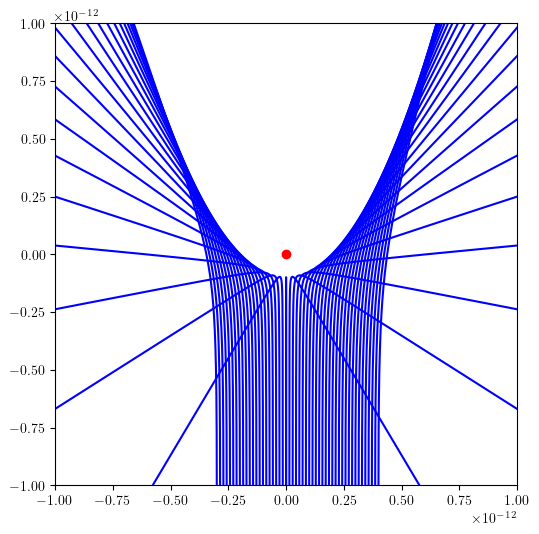

In [7]:
# Figure set up
fig,ax = plt.subplots(figsize=(6,6))
ax.set_xlim((-1e-12,1e-12))
ax.set_ylim((-1e-12,1e-12))
ax.plot([0.0],[0.0],'ro')
ax.set_aspect(aspect=1.0)

for b in np.linspace(-3e-13,4.0e-13,50):
    rv = collide(b)
    rv = np.array(rv)
    ax.plot(rv[:,0],rv[:,2],'b')

In [8]:
def collide(b,R):
    rvals = []
    r = np.array([b,0.0,-sd])
    v = np.array([0.0,0.0,v0])

    exited = False
    while not exited:
        rvals.append(r.copy())
        v += dt * Coulomb(r,q1,q2) / m
        r += dt * v
        if np.abs(r[2]) > sd:
            exited = True

        # If the alpha position goes inside the sphere, reflect
        # its velocity vector across the sphere normal
        elif np.linalg.norm(r) <= R:
            n = r / np.linalg.norm(r)
            v = v - 2*np.dot(v,n)*n
    return rvals

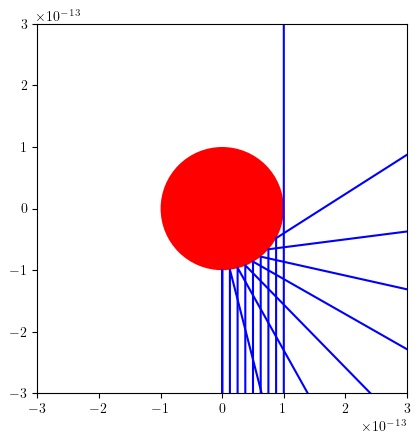

In [9]:
# Set Gold nucleus charge to zero
q1 = 0.0

# Figure set up
fig,ax = plt.subplots()
ax.set_xlim((-0.3e-12,0.3e-12))
ax.set_ylim((-0.3e-12,0.3e-12))
patch = plt.Circle((0.0,0.0), 1e-13, fc='r')
ax.add_patch(patch)
ax.set_aspect(aspect=1.0)

for b in np.linspace(0,1e-13,9):
    rv = collide(b,1e-13)
    rv = np.array(rv)
    ax.plot(rv[:,0],rv[:,2],'b')

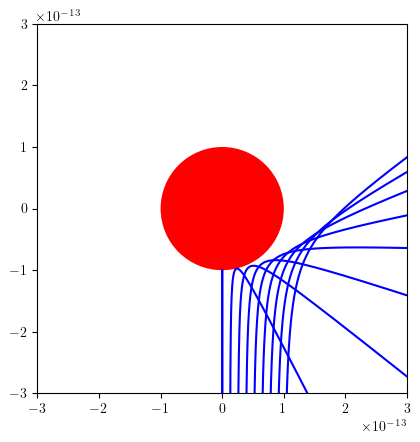

In [10]:
# Set hard sphere charge to Gold charge
q1 = constants.e * 79

# Figure set up
fig,ax = plt.subplots()
ax.set_xlim((-0.3e-12,0.3e-12))
ax.set_ylim((-0.3e-12,0.3e-12))
patch = plt.Circle((0.0,0.0), 1e-13, fc='r')
ax.add_patch(patch)
ax.set_aspect(aspect=1.0)

for b in np.linspace(0,1e-13,9):
    rv = collide(b,1e-13)
    rv = np.array(rv)
    ax.plot(rv[:,0],rv[:,2],'b')

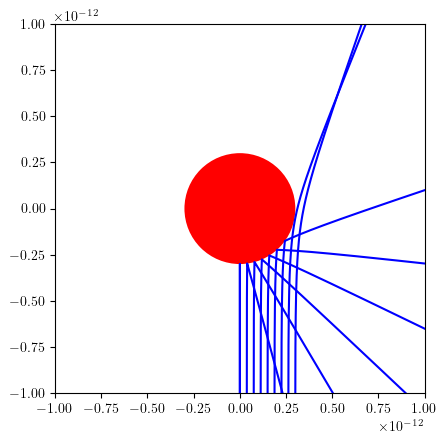

In [11]:
# Figure set up
fig,ax = plt.subplots()
ax.set_xlim((-1e-12,1e-12))
ax.set_ylim((-1e-12,1e-12))
patch = plt.Circle((0.0,0.0), 3e-13, fc='r')
ax.add_patch(patch)
ax.set_aspect(aspect=1.0)

for b in np.linspace(0,3e-13,9):
    rv = collide(b,3e-13)
    rv = np.array(rv)
    ax.plot(rv[:,0],rv[:,2],'b')

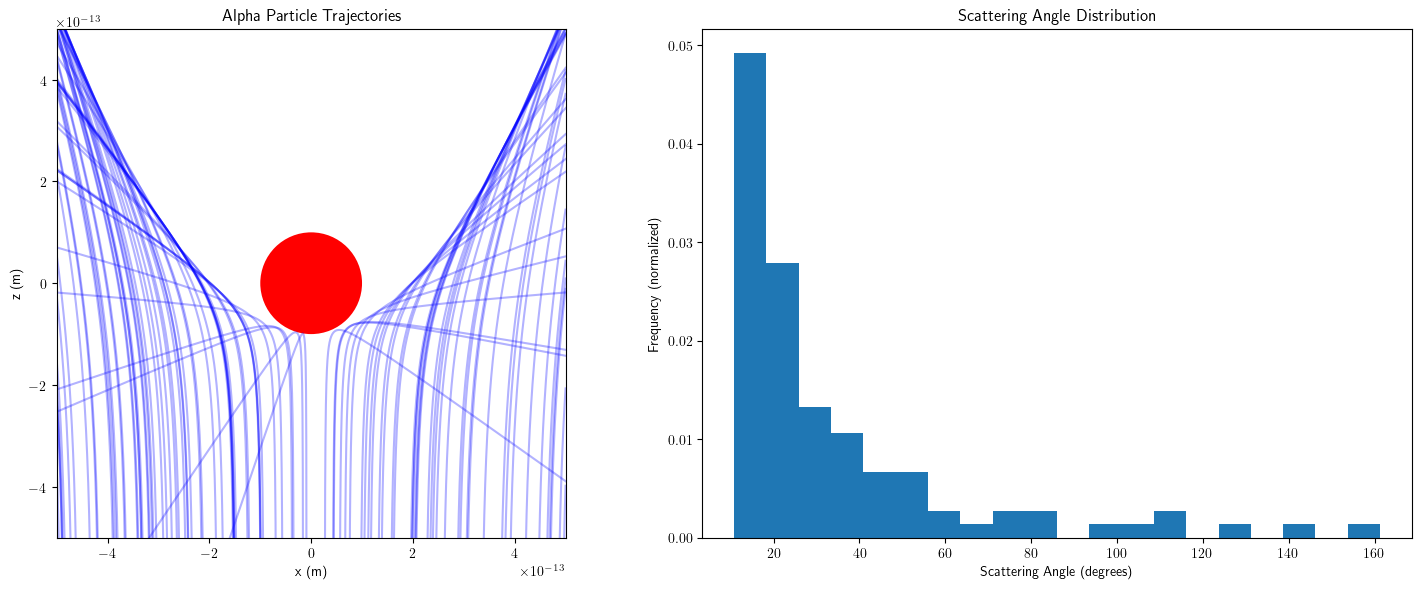

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants

q1 = constants.e * 79  # Gold nucleus charge
q2 = constants.e * 2   # Alpha particle charge
m = 6.64424e-27       # Alpha particle mass
v0 = 1e7              # Initial velocity
sd = 1e-12            # Size of simulation domain
dt = 1e-22            # Time step

def Coulomb(r, Q, q):
    """Calculate Coulomb force between two charged particles"""
    return Q*q/(4*np.pi*constants.epsilon_0*np.linalg.norm(r)**3) * r

def collide(b, R=1e-13):
    """Simulate alpha particle trajectory with given impact parameter"""
    rvals = []
    r = np.array([b, 0.0, -sd])   # Initial position
    v = np.array([0.0, 0.0, v0])  # Initial velocity

    exited = False
    while not exited:
        rvals.append(r.copy())
        v += dt * Coulomb(r, q1, q2) / m
        r += dt * v

        if np.abs(r[2]) > sd:
            exited = True

        elif np.linalg.norm(r) <= R:
            n = r / np.linalg.norm(r)
            v = v - 2*np.dot(v,n)*n

    return rvals, v

def calculate_scattering_angle(initial_v, final_v):
    """Calculate scattering angle in degrees"""
    return np.degrees(np.arccos(np.dot(initial_v, final_v) /
                               (np.linalg.norm(initial_v) * np.linalg.norm(final_v))))

def run_experiment(num_particles=50, max_impact=5e-13):
    """Run alpha scattering experiment with multiple particles"""
    # Generate random impact parameters
    impact_params = np.random.uniform(-1*max_impact, max_impact, num_particles)

    # Store trajectories and angles
    all_trajectories = []
    scattering_angles = []

    initial_v = np.array([0.0, 0.0, v0])

    for b in impact_params:
        traj, final_v = collide(b)
        all_trajectories.append(np.array(traj))
        angle = calculate_scattering_angle(initial_v, final_v)
        scattering_angles.append(angle)

    return all_trajectories, scattering_angles

def plot_results(trajectories, angles):
    """Plot trajectories and angle distribution"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Plot trajectories
    ax1.set_xlim((-0.5e-12, 0.5e-12))
    ax1.set_ylim((-0.5e-12, 0.5e-12))
    ax1.add_patch(plt.Circle((0.0, 0.0), 1e-13, fc='r'))
    ax1.set_aspect(aspect=1.0)
    ax1.set_title('Alpha Particle Trajectories')
    ax1.set_xlabel('x (m)')
    ax1.set_ylabel('z (m)')

    for traj in trajectories:
        ax1.plot(traj[:,0], traj[:,2], 'b', alpha=0.3)

    # Plot angle distribution
    ax2.hist(angles, bins=20, density=True)
    ax2.set_title('Scattering Angle Distribution')
    ax2.set_xlabel('Scattering Angle (degrees)')
    ax2.set_ylabel('Frequency (normalized)')

    plt.tight_layout()
    return fig

# Run the experiment
trajectories, angles = run_experiment(num_particles=100)
fig = plot_results(trajectories, angles)
plt.show()

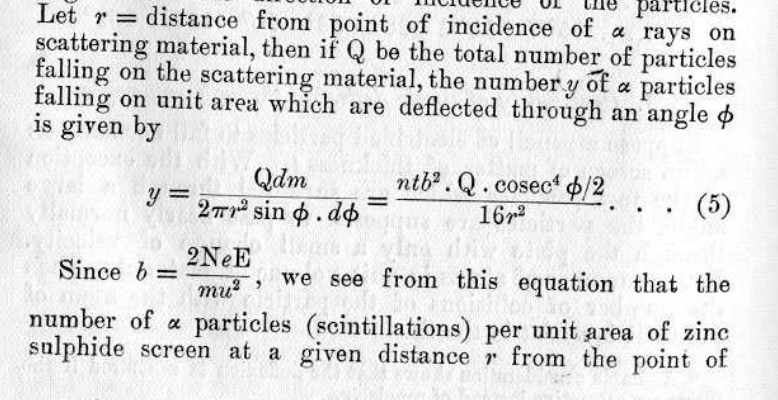

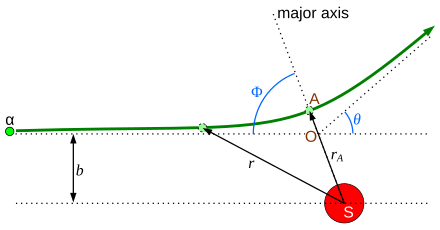

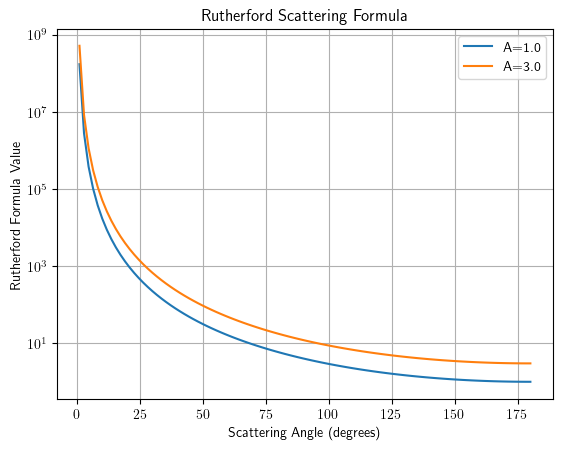

In [22]:
def rutherford_formula(theta, A):
    theta_rad = np.radians(theta)
    return A / (np.sin(theta_rad/2))**4

theta_values = np.linspace(1, 180, 100)  # From 1 to 180 degrees

A = 1.0
rutherford_values = rutherford_formula(theta_values, A)
rutherford_values1 = rutherford_formula(theta_values, 3)
# Create the plot
plt.plot(theta_values, rutherford_values,label="A=1.0")
plt.plot(theta_values, rutherford_values1,label="A=3.0")
plt.yscale('log')
plt.xlabel('Scattering Angle (degrees)')
plt.ylabel('Rutherford Formula Value')
plt.title('Rutherford Scattering Formula')
plt.legend()
plt.grid(True)
plt.show()

Scaling parameter A: 0.000
R-squared value: 0.754


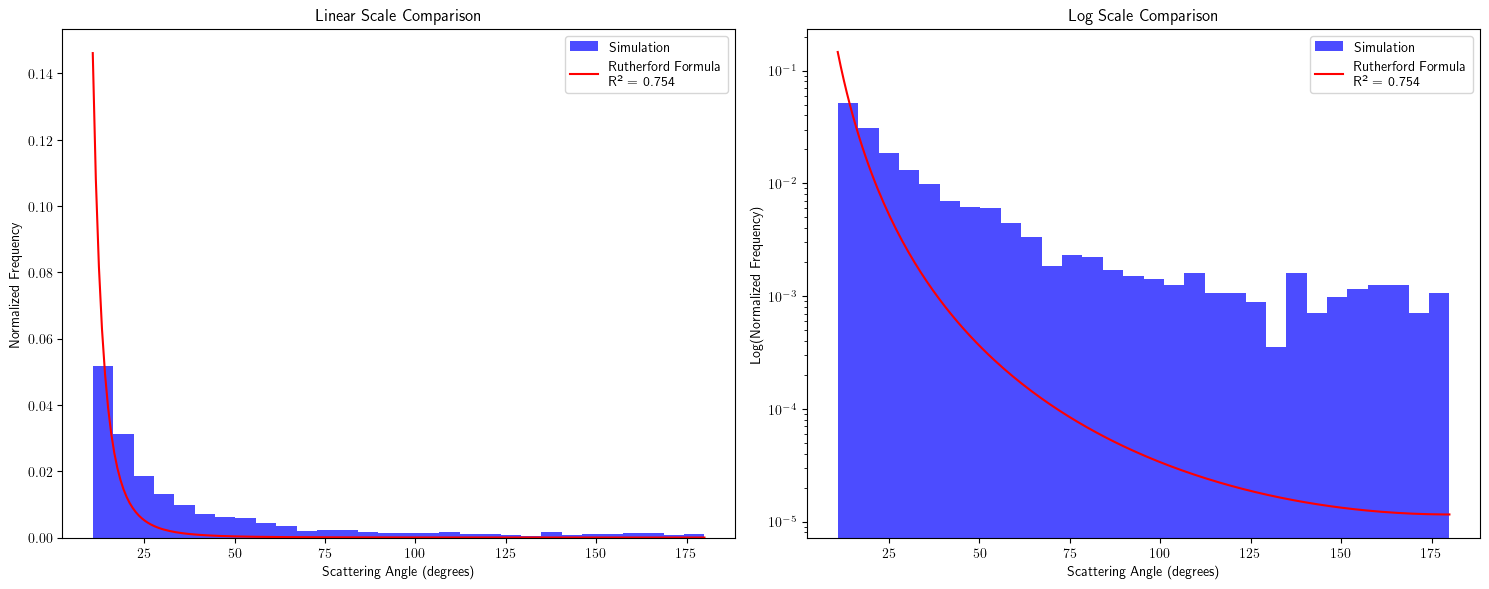

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants
from scipy.optimize import curve_fit

def rutherford_formula(theta, A):
    """
    Rutherford scattering formula: dσ/dΩ ∝ 1/sin⁴(θ/2)
    theta: scattering angle in degrees
    A: scaling parameter
    """
    theta_rad = np.radians(theta)
    return A / (np.sin(theta_rad/2))**4

def compare_with_rutherford(angles):
    """Compare simulation results with Rutherford formula"""

    # Create histogram of simulation data
    hist, bins = np.histogram(angles, bins=30, density=True)
    centers = (bins[:-1] + bins[1:]) / 2

    # Fit Rutherford formula to the simulation data
    popt, pcov = curve_fit(rutherford_formula, centers, hist, p0=[1.0])

    # Calculate R-squared (goodness of fit)
    residuals = hist - rutherford_formula(centers, popt[0])
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((hist - np.mean(hist))**2)
    r_squared = 1 - (ss_res / ss_tot)

    # Create comparison plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Linear scale plot
    ax1.hist(angles, bins=30, density=True, alpha=0.7,
             label='Simulation', color='blue')

    # Plot Rutherford formula
    theta_fit = np.linspace(min(angles), max(angles), 200)
    rutherford_fit = rutherford_formula(theta_fit, popt[0])
    ax1.plot(theta_fit, rutherford_fit, 'r-',
             label=f'Rutherford Formula\nR² = {r_squared:.3f}')

    ax1.set_xlabel('Scattering Angle (degrees)')
    ax1.set_ylabel('Normalized Frequency')
    ax1.set_title('Linear Scale Comparison')
    ax1.legend()

    # Log scale plot
    ax2.hist(angles, bins=30, density=True, alpha=0.7,
             label='Simulation', color='blue')
    ax2.plot(theta_fit, rutherford_fit, 'r-',
             label=f'Rutherford Formula\nR² = {r_squared:.3f}')

    ax2.set_yscale('log')
    ax2.set_xlabel('Scattering Angle (degrees)')
    ax2.set_ylabel('Log(Normalized Frequency)')
    ax2.set_title('Log Scale Comparison')
    ax2.legend()

    plt.tight_layout()

    # Print fit statistics
    print(f"Scaling parameter A: {popt[0]:.3f}")
    print(f"R-squared value: {r_squared:.3f}")

    return fig, r_squared

# Example usage:
trajectories, angles = run_experiment(num_particles=2000)
fig, r_squared = compare_with_rutherford(angles)
plt.show()

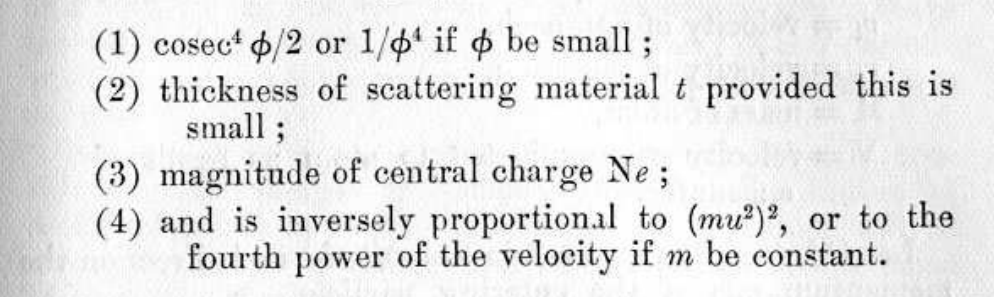

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants
from scipy.stats import kde

def analyze_scattering_results(trajectories, angles):
    angle_stats = {
        'mean': np.mean(angles),
        'median': np.median(angles),
        'std': np.std(angles),
        'max': np.max(angles),
        'min': np.min(angles)
    }

    fig = plt.figure(figsize=(15, 10))

    ax1 = plt.subplot(221)
    distances = []
    for traj in trajectories:
        # Plot trajectory
        ax1.plot(traj[:,0], traj[:,2], 'b', alpha=0.2)
        # Calculate closest approach
        distances.append(np.min(np.linalg.norm(traj, axis=1)))

    ax1.add_patch(plt.Circle((0.0, 0.0), 1e-13, fc='r'))
    ax1.set_aspect(aspect=1.0)
    ax1.set_title('Particle Trajectories')
    ax1.set_xlabel('x (m)')
    ax1.set_ylabel('z (m)')

    ax2 = plt.subplot(222)
    hist, bins, _ = ax2.hist(angles, bins=20, density=True, alpha=0.7)

    kernel = kde.gaussian_kde(angles)
    x_range = np.linspace(min(angles), max(angles), 200)
    ax2.plot(x_range, kernel(x_range), 'r-', label='KDE')
    ax2.set_title('Scattering Angle Distribution')
    ax2.set_xlabel('Scattering Angle (degrees)')
    ax2.set_ylabel('Frequency (normalized)')
    ax2.legend()

    ax3 = plt.subplot(223)
    ax3.hist(distances, bins=20, alpha=0.7)
    ax3.set_title('Distance of Closest Approach')
    ax3.set_xlabel('Distance (m)')
    ax3.set_ylabel('Count')

    ax4 = plt.subplot(224)
    ax4.scatter(distances, angles, alpha=0.5)
    ax4.set_title('Scattering Angle vs. Closest Approach')
    ax4.set_xlabel('Distance of Closest Approach (m)')
    ax4.set_ylabel('Scattering Angle (degrees)')

    plt.tight_layout()

    # Calculate theoretical Rutherford formula prediction
    def rutherford_formula(theta):
        """Simplified Rutherford scattering cross-section"""
        theta_rad = np.radians(theta)
        return 1 / (np.sin(theta_rad/2))**4

    theoretical_angles = np.linspace(1, max(angles), 100)
    cross_section = rutherford_formula(theoretical_angles)

    # Normalize for comparison
    cross_section = cross_section / np.max(cross_section)

    # 4. Create comparison plot
    fig2, ax5 = plt.subplots(figsize=(8, 6))
    ax5.hist(angles, bins=20, density=True, alpha=0.7, label='Simulation')
    ax5.plot(theoretical_angles, cross_section, 'r-', label='Rutherford Formula')
    ax5.set_title('Comparison with Rutherford Formula')
    ax5.set_xlabel('Scattering Angle (degrees)')
    ax5.set_ylabel('Normalized Frequency')
    ax5.legend()

    return {
        'angle_stats': angle_stats,
        'min_distance': min(distances),
        'max_distance': max(distances),
        'figures': [fig, fig2]
    }

<ipython-input-14-830aa50ff1c3>:41: DeprecationWarning: Please import `gaussian_kde` from the `scipy.stats` namespace; the `scipy.stats.kde` namespace is deprecated and will be removed in SciPy 2.0.0.
  kernel = kde.gaussian_kde(angles)


Statistical Analysis:
mean: 38.60
median: 21.31
std: 38.73
max: 166.92
min: 10.94


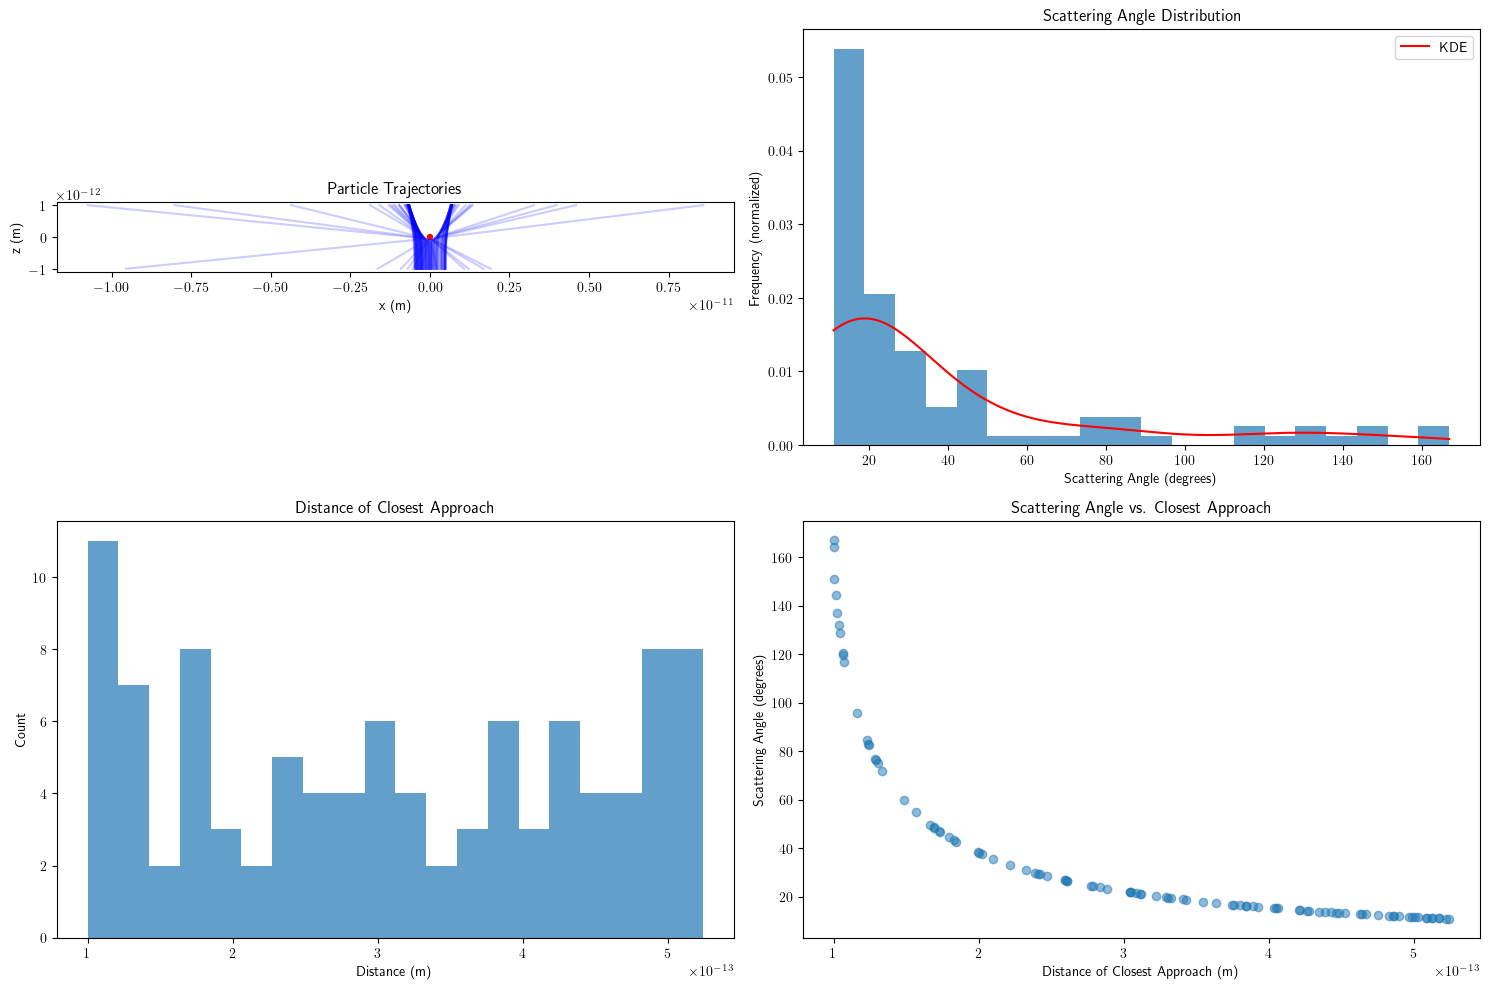

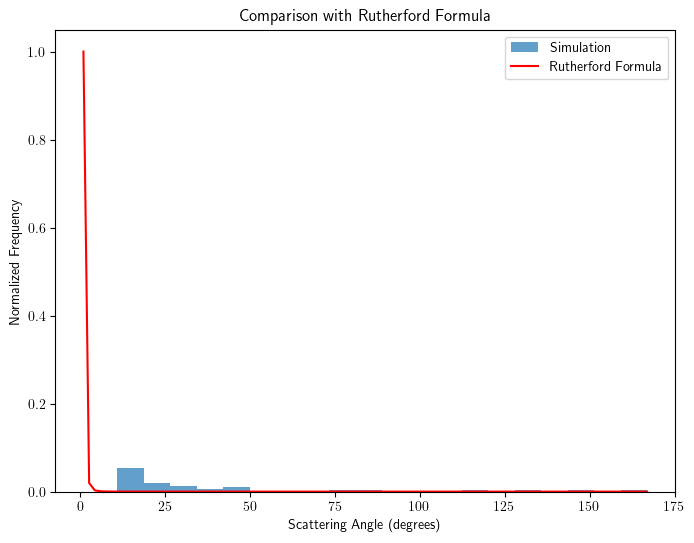

In [15]:
trajectories, angles = run_experiment(num_particles=100)
results = analyze_scattering_results(trajectories, angles)
print("Statistical Analysis:")
for key, value in results['angle_stats'].items():
    print(f"{key}: {value:.2f}")

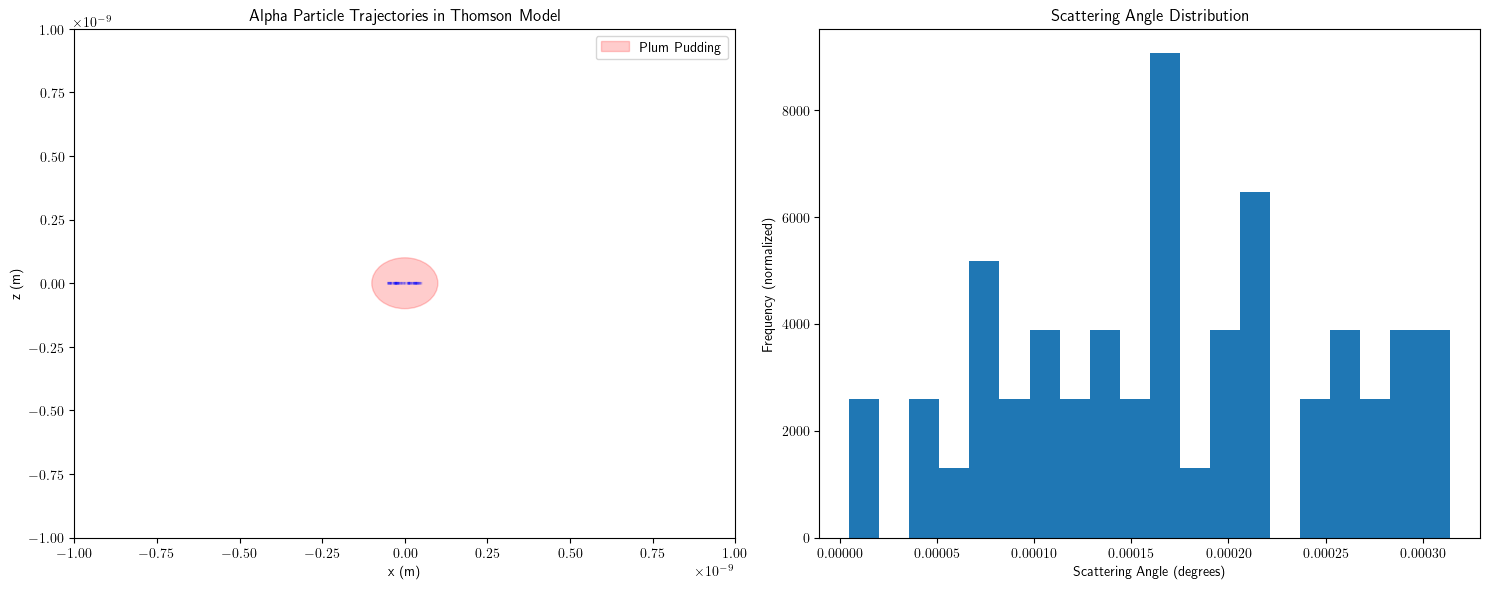

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants

# Define physical constants
q1 = constants.e * 79  # Gold nucleus total charge
q2 = constants.e * 2   # Alpha particle charge
m = 6.64424e-27       # Alpha particle mass
v0 = 1e7              # Initial velocity
sd = 1e-12            # Size of simulation domain
dt = 1e-22            # Time step
R = 1e-10             # Radius of the plum pudding (larger than nuclear model)

def thomson_force(r, Q, q, R):
    """
    Calculate force in Thomson's model
    Force is proportional to distance within sphere (like spring force)
    Zero force at center, maximum at surface
    """
    r_mag = np.linalg.norm(r)

    if r_mag <= R:
        # Inside the sphere: force proportional to distance (Gaussian law)
        # F = kQqr/R³ for r < R
        return (Q * q * r)/(4 * np.pi * constants.epsilon_0 * R**3)
    else:
        # Outside the sphere: standard Coulomb force
        # F = kQq/r² for r > R
        return (Q * q)/(4 * np.pi * constants.epsilon_0 * r_mag**3) * r

def collide(b):
    """Simulate alpha particle trajectory with given impact parameter"""
    rvals = []
    r = np.array([b, 0.0, -sd])   # Initial position
    v = np.array([0.0, 0.0, v0])  # Initial velocity

    exited = False
    while not exited:
        rvals.append(r.copy())

        # Calculate force using Thomson model
        F = thomson_force(r, q1, q2, R)

        # Update velocity and position using Euler method
        v += dt * F / m
        r += dt * v

        # Check if particle has left simulation domain
        if np.abs(r[2]) > sd:
            exited = True

    return rvals, v

def run_experiment(num_particles=50, max_impact=5e-11):
    """Run scattering experiment with multiple particles"""
    impact_params = np.random.uniform(-1*max_impact, max_impact, num_particles)
    all_trajectories = []
    scattering_angles = []

    initial_v = np.array([0.0, 0.0, v0])

    for b in impact_params:
        traj, final_v = collide(b)
        all_trajectories.append(np.array(traj))

        # Calculate scattering angle
        angle = np.degrees(np.arccos(np.dot(initial_v, final_v) /
                                   (np.linalg.norm(initial_v) * np.linalg.norm(final_v))))
        scattering_angles.append(angle)

    return all_trajectories, scattering_angles

def plot_results(trajectories, angles):
    """Plot trajectories and angle distribution"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Plot trajectories
    ax1.set_xlim((-1e-9, 1e-9))
    ax1.set_ylim((-1e-9, 1e-9))

    # Draw plum pudding sphere
    circle = plt.Circle((0, 0), R, color='r', alpha=0.2, label='Plum Pudding')
    ax1.add_patch(circle)

    # Plot trajectories
    for traj in trajectories:
        ax1.plot(traj[:,0], traj[:,2], 'b', alpha=0.3)

    ax1.set_title('Alpha Particle Trajectories in Thomson Model')
    ax1.set_xlabel('x (m)')
    ax1.set_ylabel('z (m)')
    ax1.legend()

    # Plot angle distribution
    ax2.hist(angles, bins=20, density=True)
    ax2.set_title('Scattering Angle Distribution')
    ax2.set_xlabel('Scattering Angle (degrees)')
    ax2.set_ylabel('Frequency (normalized)')

    plt.tight_layout()
    return fig

# Run simulation
trajectories, angles = run_experiment(num_particles=50)
fig = plot_results(trajectories, angles)
plt.show()